## Notes
忽略Keras RL的部分。Stable-baselines在下面  
这个现在用的是gym 0.26.2, 在monitor.py里有一个return的问题可能需要更改return的value数量才能兼容  
PPO感觉挺好的，在只120步的时候可以超过random选择的return。DQN在训练120步的时候不行。

## Keras RL DQN

In [1]:
!pip install -e disneyenv


Obtaining file:///gpfs/data/oermannlab/users/hz2212/DS-GA%203001-007/disneyenv
  Preparing metadata (setup.py) ... done
  Attempting uninstall: disneyenv
    Found existing installation: disneyenv 0.0.1
    Uninstalling disneyenv-0.0.1:
      Successfully uninstalled disneyenv-0.0.1
  Running setup.py develop for disneyenv


In [2]:
import gymnasium as gym
import disneyenv

env = gym.make('disneyenv/Disney-v0') 


/gpfs/data/oermannlab/users/hz2212/DS-GA 3001-007/disneyenv/disneyenv/envs/disney.py:42: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  self.waittime = pd.read_csv(


AssertionError: action space does not inherit from `gymnasium.spaces.Space`, actual type: <class 'gym.spaces.discrete.Discrete'>

In [ ]:
import numpy as np
import pandas as pd

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten,Input,Dropout,Reshape
from tensorflow.keras.optimizers import Adam

from rl.agents import DQNAgent
from rl.memory import SequentialMemory
from rl.policy import LinearAnnealedPolicy, EpsGreedyQPolicy

In [4]:
def build_model(input_shape, output_shape):
    model = Sequential([
        Dense(512,activation="relu",input_shape = (1,input_shape)),
        Dropout(0.2),
        Flatten(),
        Dense(256,activation = "relu"),
        Dropout(0.2),
        Dense(128,activation = "relu"),
        Dense(64,activation = "relu"),
        Dense(output_shape,activation = "linear"),
        Flatten()
    ])
    model.summary()
    return model

In [5]:
def build_agent(model, actions):
    policy = LinearAnnealedPolicy(EpsGreedyQPolicy(), attr='eps', value_max=1., value_min=.1, value_test=.2, nb_steps=10000)
    memory = SequentialMemory(limit=2000,window_length = 1)
    dqn = DQNAgent(model=model, memory=memory, policy=policy,
                  enable_dueling_network=True, dueling_type='avg',
                  nb_actions=actions, nb_steps_warmup=10)
    return dqn

In [6]:
model = build_model(env.observation_space.n,env.action_space.n)
dqn_agent = build_agent(model,env.action_space.n)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1, 512)            118784    
                                                                 
 dropout (Dropout)           (None, 1, 512)            0         
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 64)                8

In [7]:
dqn_agent.compile(Adam(learning_rate=0.001))

In [8]:
dqn_agent.fit(env, nb_steps = 1000, visualize = False, verbose = 1) 

Training for 1000 steps ...


c:\Users\82751\anaconda3\envs\my_environment\lib\site-packages\gymnasium\utils\passive_env_checker.py:174: UserWarning: WARN: Future gymnasium versions will require that `Env.reset` can be passed a `seed` instead of using `Env.seed` for resetting the environment random number generator.
  logger.warn(
c:\Users\82751\anaconda3\envs\my_environment\lib\site-packages\gymnasium\utils\passive_env_checker.py:187: UserWarning: WARN: Future gymnasium versions will require that `Env.reset` can be passed `options` to allow the environment initialisation to be passed additional information.
  logger.warn(


A new day! Today is 2018-7-26
Interval 1 (0 steps performed)


c:\Users\82751\anaconda3\envs\my_environment\lib\site-packages\gymnasium\utils\passive_env_checker.py:195: UserWarning: WARN: The result returned by `env.reset()` was not a tuple of the form `(obs, info)`, where `obs` is a observation and `info` is a dictionary containing additional information. Actual type: `<class 'numpy.ndarray'>`
  logger.warn(
c:\Users\82751\anaconda3\envs\my_environment\lib\site-packages\keras\engine\training_v1.py:2356: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


    1/10000 [..............................] - ETA: 1:21:38 - reward: 1.0000

c:\Users\82751\anaconda3\envs\my_environment\lib\site-packages\gymnasium\utils\passive_env_checker.py:133: UserWarning: WARN: The obs returned by the `step()` method should be an int or np.int64, actual type: <class 'numpy.ndarray'>
  logger.warn(f"{pre} should be an int or np.int64, actual type: {type(obs)}")
c:\Users\82751\anaconda3\envs\my_environment\lib\site-packages\gymnasium\utils\passive_env_checker.py:165: UserWarning: WARN: The obs returned by the `step()` method is not within the observation space.
  logger.warn(f"{pre} is not within the observation space.")


   11/10000 [..............................] - ETA: 46:40 - reward: -35.2727

c:\Users\82751\anaconda3\envs\my_environment\lib\site-packages\rl\memory.py:37: UserWarning: Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!
  warnings.warn('Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!')


 1000/10000 [==>...........................] - ETA: 49:28 - reward: -29.2526done, took 330.622 seconds


## Agent without RL

In [4]:
!pip install -e disneyenv

Obtaining file:///C:/Users/82751/OneDrive/Desktop/NYU/Reinforcement%20Learning/DS-GA-3001-007-Final-Project/disneyenv
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Attempting uninstall: disneyenv
    Found existing installation: disneyenv 0.0.1
    Uninstalling disneyenv-0.0.1:
      Successfully uninstalled disneyenv-0.0.1
  Running setup.py develop for disneyenv


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import gym
import disneyenv

In [2]:
env = gym.make("disneyenv/Disney-v0")

### Random

In [ ]:
obs = env.reset()
episode_return = []
while True:
    action = obs.action_space.sample
    obs, reward, done, info = env.step(action)
    print("at",env.current_time," the agent go to ride ",env.current_location,"in current land",env.current_land,"and get a reward of",reward)

    episode_return += [reward]
    if (done):
        obs = env.reset()
        break

### Deterministic

In [7]:
# A deterministic agent
obs = env.reset()
reward_arr = env.ridesinfo.popularity.apply(lambda x:  5 if type(x)!=str else env.reward_dict[x]).to_numpy()

def get_action(obs,reward_arr=reward_arr):
    indicies = np.where((obs["operationStatus"]  + ~obs["pastActions"]) == 2)[0]
    if len(indicies) == 0:
        return 106
    
    wait_arr = obs["waitTime"][indicies]
    reward_arr = reward_arr[indicies]
    tmp = np.argmax([reward/wait if wait != 0 else reward for wait,reward in zip(wait_arr,reward_arr)])

    action = indicies[tmp]
    return action


episode_return = []
while True:
    action = get_action(obs)
    obs, reward, done, info = env.step(action)
    print("at",env.current_time," the agent go to ride ",env.current_location,"in current land",env.current_land,"and get a reward of",reward)

    episode_return += [reward]
    if (done):
        obs = env.reset()
        break


A new day! Today is 2018-03-29
at 2018-03-29 08:12:38.425107  the agent go to ride  11 in current land 1 and get a reward of 19.68595815464862
at 2018-03-29 08:33:38.425107  the agent go to ride  12 in current land 1 and get a reward of 19.9
at 2018-03-29 08:55:28.854042  the agent go to ride  38 in current land 4 and get a reward of 19.71595177523095
at 2018-03-29 09:10:52.422618  the agent go to ride  65 in current land 8 and get a reward of 19.710719039255316
at 2018-03-29 09:31:58.194264  the agent go to ride  83 in current land 10 and get a reward of 19.090380590370867
at 2018-03-29 09:55:10.443845  the agent go to ride  48 in current land 5 and get a reward of 18.57958403133405
at 2018-03-29 10:21:51.364237  the agent go to ride  90 in current land 12 and get a reward of 19.33179934618687
at 2018-03-29 10:50:50.298196  the agent go to ride  4 in current land 0 and get a reward of 9.301776734439997
at 2018-03-29 11:48:25.837328  the agent go to ride  23 in current land 2 and get a

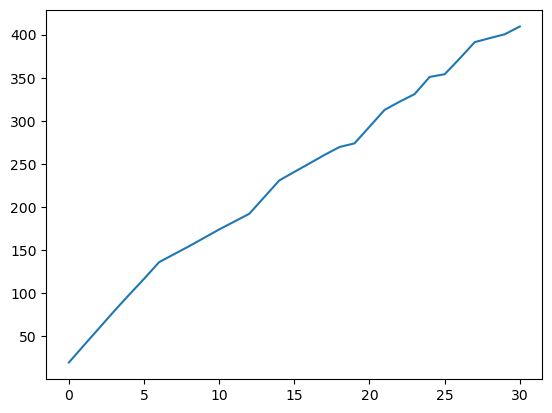

In [8]:
plt.plot(np.arange(len(episode_return)),np.cumsum(episode_return))

## Stable Baseline3 DQN 

In [1]:
!pip install -e disneyenv
import disneyenv

Obtaining file:///gpfs/data/oermannlab/users/hz2212/DS-GA%203001-007/disneyenv
  Preparing metadata (setup.py) ... done
  Attempting uninstall: disneyenv
    Found existing installation: disneyenv 0.0.1
    Uninstalling disneyenv-0.0.1:
      Successfully uninstalled disneyenv-0.0.1
  Running setup.py develop for disneyenv


In [2]:
import gym
import torch
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3.common.vec_env import DummyVecEnv, SubprocVecEnv
from stable_baselines3 import PPO, DQN
import numpy as np

In [3]:
env = gym.make("disneyenv/Disney-v0")
device = "cuda" if torch.cuda.is_available() else "cpu"
agent = PPO("MultiInputPolicy",env,verbose=1, device=device)
agent.learn(total_timesteps=100)
# agent = PPO("MultiInputPolicy",env,verbose=1, device=device, batch_size=1024, n_steps=1024)
# agent.learn(total_timesteps=10000)

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
A new day! Today is 2017-06-28
34 4.28935758196377 0 0
53 4.28935758196377 0 0
28 4.28935758196377 0 0
99 10.98346366328823 0 0
97 1 0 0
26 3.9159537738724377 10.0 1.33
75 19.59417004116794 0 0
28 6.952561299901862 5.0 1.7
57 4.28935758196377 0.0 15.0
3 4.427468568945695 90.0 6.0
0 1 0.0 23.0
37 8.475478910832758 15.0 9.5
73 6.952561299901862 0.0 1.0
25 8.915803968707229 0 0
24 1 0 0
56 3.1860278534694153 0 0
28 4.28935758196377 50.0 1.7
14 2.840482247690528 50.0 2.25
28 2.840482247690528 50.0 1.7
3 8.475478910832758 90.0 6.0
93 3.2092080495726365 120.0 6.0
99 1 0 0
66 8.47101437623175 0.0 9.0
36 2.8928096074512313 25.0 2.5
52 4.989969523972208 15.0 4.0
81 8.525921822877574 70.0 8.0
56 8.589987861357613 0 0
31 4.28935758196377 0 0
62 4.28935758196377 0 0
100 3.644003512864643 0.0 11.0
64 5.441703570715497 60.0 3.0
The day is over! The reward is 123.26499458149094
A new day! Today is 2017-07-1

91 7.5295996928419155 0 0
15 5.304757208164739 35.0 7.0
The day is over! The reward is 358.80087827857795
A new day! Today is 2018-01-24
83 8.589987861357613 0 0
98 6.6196616796660415 0 0
24 9.535217852583342 0 0
54 3.1860278534694153 0 0
45 6.748117384482564 0 0
11 4.773058359766563 0 0
69 9.05524889913785 0 0
65 9.704361340810864 0 0
89 1.9952684778632919 0 0
41 4.544168001735182 0 0
82 11.95665705905574 0 0
54 8.589987861357613 0 0
22 3.1860278534694153 0 0
2 7.5923188645377415 0 0
45 10.839894901576656 0 0
41 2.464349992427426 0 0
101 7.932349138577956 0 0
75 14.878335786181772 0 0
44 4.491214084073219 0 0
34 2.464349992427426 0 0
94 10.98346366328823 10.0 2.0
27 10.98346366328823 5.0 4.0
10 2.840482247690528 5.0 4.5
38 2.840482247690528 0 0
28 1 0 0
27 1 15.0 4.0
85 11.95665705905574 0.0 24.0
23 9.561408510377229 5.0 45.0
89 2.053023649280206 15.0 9.0
33 4.544168001735182 30.0 3.0
29 1 10.0 3.0
62 4.28935758196377 0 0
101 3.644003512864643 0.0 11.0
71 14.878335786181772 0.0 10.0
6

69 6.952561299901862 5.0 1.5
15 9.05524889913785 50.0 7.0
The day is over! The reward is 208.0751497875886
A new day! Today is 2017-10-11
89 3.151147998568417 0 0
37 4.544168001735182 0 0
91 4.544168001735182 0 0
6 6.982232655600034 0 0
66 6.432100735836362 0 0
65 1 0 0
13 3.327583925554344 0 0
90 5.304757208164739 0 0
103 0 10 0
96 8.298973953604898 0 0
6 3.2092080495726365 0.0 1.0
56 4.427468568945695 0.0 3.0
53 1 10.0 22.0
12 3.1404184535094077 5.0 15.0
15 1 50.0 7.0
97 9.206277510904412 0 0
86 3.147782119747535 55.0 7.0
14 8.541454733661212 35.0 2.25
102 5.735536320412861 0.0 60.0
82 8.067995285858656 5.0 2.0
27 11.95665705905574 15.0 4.0
45 2.464349992427426 0.0 5.0
62 6.748117384482564 0 0
32 4.28935758196377 30.0 2.0
86 9.55163482673063 60.0 7.0
36 9.55163482673063 30.0 2.5
62 4.28935758196377 0 0
65 2.0196961183755557 25.0 7.5
91 1.9952684778632919 0 0
92 7.783068445394643 0.0 9.0
64 8.280933018946106 50.0 3.0
42 5.283685436233072 0.0 10.0
51 6.472569343161453 30.0 11.0
87 7.80

Traceback (most recent call last):
  File "/gpfs/data/oermannlab/users/hz2212/.conda/envs/ds3001-007/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3505, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_127217/2263628019.py", line 4, in <module>
    agent.learn(total_timesteps=100)
  File "/gpfs/data/oermannlab/users/hz2212/.conda/envs/ds3001-007/lib/python3.10/site-packages/stable_baselines3/ppo/ppo.py", line 299, in learn
    return super(PPO, self).learn(
  File "/gpfs/data/oermannlab/users/hz2212/.conda/envs/ds3001-007/lib/python3.10/site-packages/stable_baselines3/common/on_policy_algorithm.py", line 234, in learn
    continue_training = self.collect_rollouts(self.env, callback, self.rollout_buffer, n_rollout_steps=self.n_steps)
  File "/gpfs/data/oermannlab/users/hz2212/.conda/envs/ds3001-007/lib/python3.10/site-packages/stable_baselines3/common/on_policy_algorithm.py", line 175, in collect_rollouts
    new_obs, reward

In [ ]:
obs = env.reset()
return_val = []
while True:
    action, _states = agent.predict(obs, deterministic=False)
    #action = env.action_space.sample()
    obs, reward, done, info = env.step(action)
    print("at", env.current_time, "agent go to ride", action, "and get reward", reward)
    return_val += [reward]
    
    if done:
        print(return_val)
        break
